In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import itertools

In [2]:
infile = open('../river_sources.pkl', 'rb')
river_sources = pickle.load(infile)

In [3]:
particles = xr.load_dataset('../data/forward_2years.nc')
particles

<xarray.Dataset>
Dimensions:     (obs: 1321, traj: 1000000)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 1e+06 1e+06 1e+06 ... 2e+06 2e+06 2e+06
    time        (traj, obs) datetime64[ns] 2018-01-01T12:00:00 ... 2019-10-23...
    lat         (traj, obs) float32 -9.292102 -9.235152 ... -35.696754 -35.66999
    lon         (traj, obs) float32 13.002034 12.962987 ... -29.274343
    z           (traj, obs) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.1.dev292+gc6c2d7bb
    parcels_mesh:           spherical

In [4]:
! git branch

* forward
  master


In [5]:
parcels_origin = {'Luanda': (-9.3, 13.),
                 'Cuvo': (-10.87917, 13.7),
                 'Paraíba do Sul': (-21.6208, -40.9),
                 'Itajaí-Açu': (-26.9125, -48.5),
                 'Chiloango-Congo': (-5.6442, 12.05),
                 'Cape-Town': (-33.93, 18.2),
                 'Rio-de-la-Plata': (-34.3, -58.2),
                 'Rio-de-Janeiro': (-23.1, -43.32083),
                 'Porto-Alegre': (-32.15, -51.9),
                 'Santos': (-24.05, -46.2958)}

In [6]:
labels= ['Luanda', 
         'Cuvo', 
         'Paraíba do Sul', 
         'Itajaí-Açu', 
         'Chiloango-Congo', 
         'Cape-Town', 
         'Rio-de-la-Plata', 
         'Rio-de-Janeiro', 
         'Porto-Alegre', 
         'Santos']

In [7]:
for j,i in enumerate(range(0, 1000000, 100000)):
    print(i, i+1000000, particles['lat'][i,0].values, particles['lon'][i,0].values)

0 1000000 -9.292102 13.002034
100000 1100000 -10.863335 13.701469
200000 1200000 -21.609884 -40.91176
300000 1300000 -26.90564 -48.488934
400000 1400000 -5.660698 12.029167
500000 1500000 -33.9215 18.199514
600000 1600000 -34.295685 -58.208424
700000 1700000 -23.097609 -43.315678
800000 1800000 -32.143936 -51.90631
900000 1900000 -24.055046 -46.284233


In [8]:
london_tube = ['#B36305', 
                '#E32017',
                '#FFD300',
                '#00782A',
                '#00A4A7',
                '#F3A9BB',
                #'#A0A5A9',
                '#9B0056',
                #'#000000',
                '#EE7C0E',
                '#003688',
                '#84B817',
                '#0098D4',
                '#95CDBA']

In [9]:
time_range = pd.date_range('2018-01-01T12:00:00', '2019-10-23T12:00:00', freq='12H')

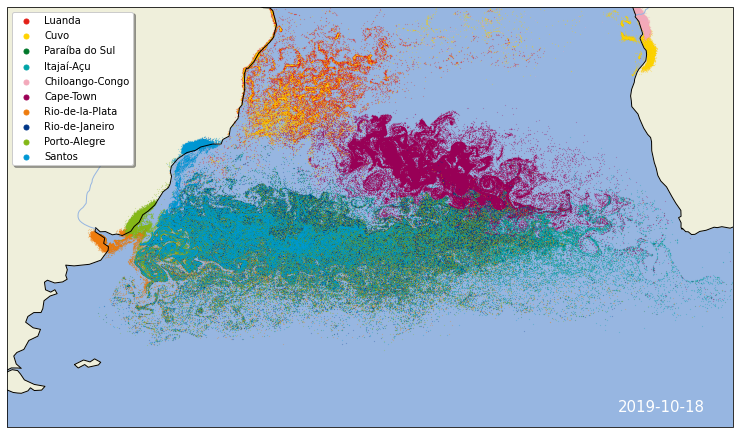

In [10]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-70, 25, -60, -5), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)

t = 1310
ax.text(10,-58,time_range[t].date(), color='white', fontsize=15)
for j,n in enumerate(range(0, 1000000, 100000)):
    #print(i, i+1000000, particles['lat'][i,0].values, particles['lon'][i,0].values)
    m = n+100000
    ax.scatter(particles['lon'][n:m,t], particles['lat'][n:m,t], color=london_tube[j+1], s=0.01, label=labels[j]);
    
plt.legend(markerscale=50, shadow=True);


In [314]:
!mkdir tmp

k = 1
for t in range(0,1321, 5):
    fig = plt.figure(figsize=(13,13))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent((-70, 25, -60, -5), crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.RIVERS)
    ax.text(10,-58, time_range[t].date(), color='white', fontsize=15)
    for j,n in enumerate(range(0, 1000000, 100000)):
        m = n+100000
        ax.scatter(particles['lon'][n:m,t], particles['lat'][n:m,t], color=london_tube[j+1], s=0.01, label=labels[j]);

    plt.legend(markerscale=50, shadow=True);
    plt.savefig(f'tmp/frame_{k:03d}', dpi=100)
    k +=1
    plt.close()
    
!convert -delay 5 -loop 0 tmp/*.png anim_particles.gif
!rm -rf tmp

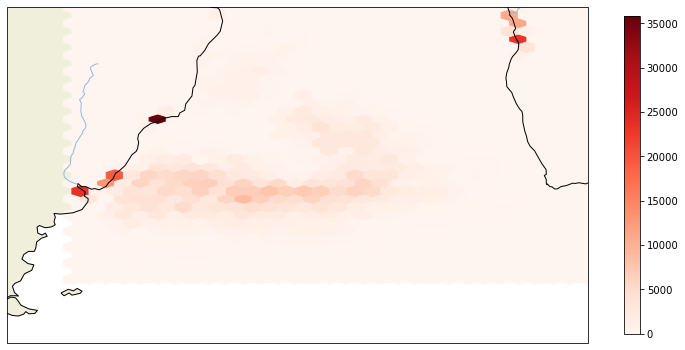

In [11]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-70, 25, -60, -5), crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)

t = 1320
n = 100000

ax.text(10,-58,time_range[t].date(), color='white', fontsize=15)

    
m = n+100000
#ax.scatter(particles['lon'][n:m,t], particles['lat'][n:m,t], color=london_tube[j+1], s=0.01, label=labels[j]);


hb = ax.hexbin(particles['lon'][:,t], particles['lat'][:,t], vmin=0, gridsize=30, cmap='Reds')
cb = fig.colorbar(hb, ax=ax, shrink=0.45)

# mask

In [12]:
model = xr.open_dataset('../data/mercatorpsy4v3r1_gl12_mean_20180101_R20180110.nc')
indices = {'lat': slice(1, 900), 'lon': slice(1284, 2460)}

In [13]:
u = model['uo'][0,0,indices['lat'], indices['lon']]

In [14]:
lat_1 = model['latitude'][indices['lat']].values[0]
lat_2 = model['latitude'][indices['lat']].values[-1]
lon_1 = model['longitude'][indices['lon']].values[0]
lon_2 = model['longitude'][indices['lon']].values[-1]

domain_coords = {'lat_lims':[lat_1, lat_2],
                 'lon_lims':[lon_1, lon_2],
                 'lat':model['latitude'][indices['lat']].values,
                 'lon':model['longitude'][indices['lon']].values}

for i in itertools.product(domain_coords['lat_lims'], domain_coords['lon_lims']):
    print(i)

(-79.916664, -73.0)
(-79.916664, 24.916666)
(-5.0833335, -73.0)
(-5.0833335, 24.916666)


In [15]:
domain_coords['lat'].shape

(899,)

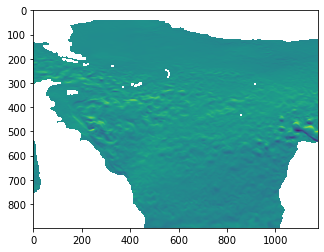

In [16]:
plt.imshow(u)

In [82]:
unos = np.ones_like(u)

In [83]:
mask = np.isnan(u.values)

In [227]:
domain_coords['land_mask'] = mask

In [229]:
domain_coords.keys()

dict_keys(['lat_lims', 'lon_lims', 'lat', 'lon', 'land_mask'])

In [230]:
np.save('../python/support_data.npy', domain_coords)

In [84]:
unos_mask = np.ma.masked_array(unos, mask=mask)

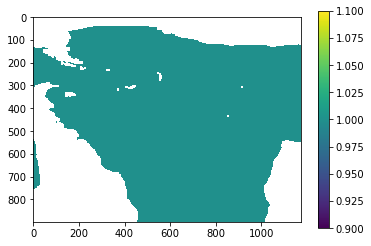

In [85]:
plt.imshow(unos_mask)
plt.colorbar()

# masked

In [248]:
t = 1300
lons = particles['lon'][:,t].values
index = np.where(np.isnan(lons) == False)
lons = lons[index]
lats = particles['lat'][:,t].values
index = np.where(np.isnan(lats) == False)
lats = lats[index]

for coord_tuple in itertools.product(domain_coords['lat_lims'], domain_coords['lon_lims']):
    lats = np.hstack((lats,coord_tuple[0]))
    lons = np.hstack((lons,coord_tuple[1]))

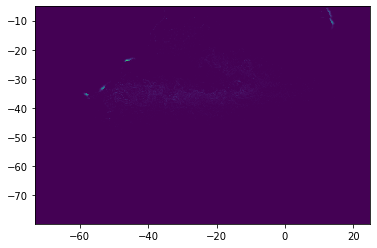

In [249]:
h, la, lo, im = plt.hist2d(lons, lats, bins=(1176, 899))

In [250]:
H, Lo, La = np.histogram2d(lons, lats, bins=(1176, 899))

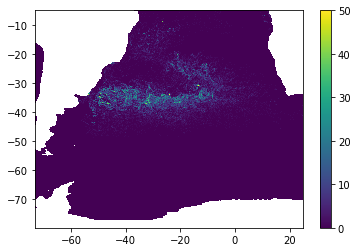

In [252]:
y,x = np.meshgrid(domain_coords['lat'], domain_coords['lon'])
h_mask = np.ma.masked_array(H, mask=mask.transpose())
y.shape
plt.pcolormesh(x,y,h_mask, vmax=50, shading='auto')
plt.colorbar()

In [104]:
h_mask = np.ma.masked_array(H, mask=mask.transpose())

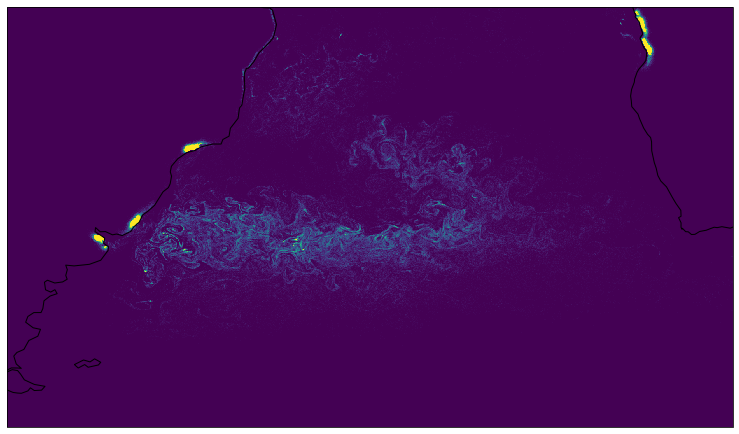

In [105]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-70, 25, -60, -5), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.RIVERS)

ax.pcolormesh(x,y,H, shading='auto', cmap='viridis', vmax=70)

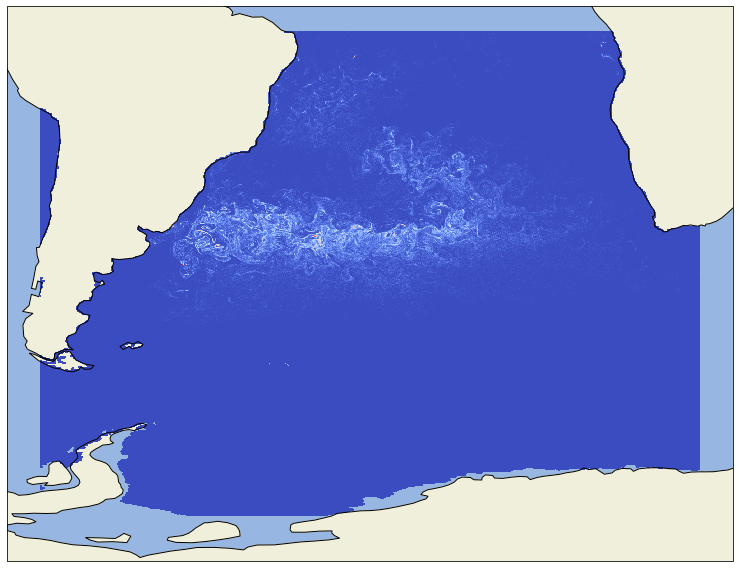

In [190]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent((-70, 25, -60, -5), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.RIVERS)

ax.pcolormesh(x,y,h_mask, shading='auto', cmap='coolwarm')

### Coarsening

In [207]:
def coarsen(array, x, y, factor):
    """
    Function to coarsen a 2d array by a especified factor.
    WARNING: If array dimensions are not multiples of the 
    factor it trims the array to make it a multiple of the 
    factor. 
    array: 2d numpy array.
    factor: positive integer.
    
    Returns: 2d numpy array.
    """
    q = array.shape[0]//factor
    w = array.shape[1]//factor
    k = array.shape[0] - array.shape[0]%factor
    l = array.shape[1] - array.shape[1]%factor
    array = array[:k,:l]
    aux = array.reshape((array.shape[0]//factor, factor,
                        array.shape[1]//factor, factor))
    array = np.sum(aux, axis=(1,3))
    x = np.linspace(x[0], x[-1], q)
    y = np.linspace(y[0], y[-1], w)
    return array, x, y

In [233]:
a = np.linspace(0,8,9)
b = np.linspace(0,80,18)
coarsen(np.ones((9,18)), a, b, 3)

(array([[9., 9., 9., 9., 9., 9.],
        [9., 9., 9., 9., 9., 9.],
        [9., 9., 9., 9., 9., 9.]]),
 array([0., 4., 8.]),
 array([ 0., 16., 32., 48., 64., 80.]))

In [240]:
h_c, x_c, y_c = coarsen(h_mask, domain_coords['lon'], domain_coords['lat'], 15)

In [241]:
domain_coords['lon_lims'] + domain_coords['lat_lims']

[-73.0, 24.916666, -79.916664, -5.0833335]

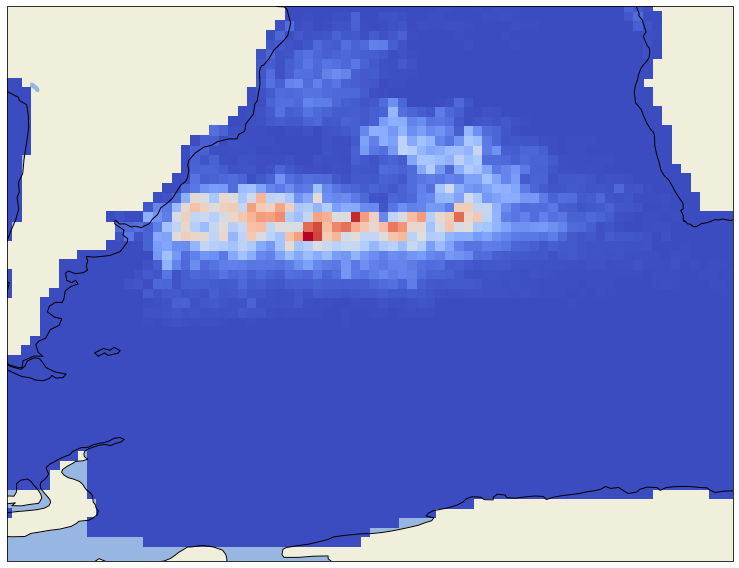

In [242]:
y,x = np.meshgrid(y_c, x_c)
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(domain_coords['lon_lims'] + domain_coords['lat_lims'], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)

ax.pcolormesh(x,y,h_c/1e6, shading='auto', cmap='coolwarm')

# main loop

In [322]:
t = 1320
n = 100000

histograms = {}
coarse_hist = {}


for j,n in enumerate(range(0, 1000000, 100000)):
    m = n+100000
    print(labels[j])
    
    lons = particles['lon'][n:m,t].values
    index = np.where(np.isnan(lons) == False)
    lons = lons[index]
    lats = particles['lat'][n:m,t].values
    index = np.where(np.isnan(lats) == False)
    lats = lats[index]
    
    # apppending corner points of the domain to keep the 2d histograms the same dimension
    for coord_tuple in itertools.product(domain_coords['lat_lims'], domain_coords['lon_lims']):
        lats = np.hstack((lats,coord_tuple[0]))
        lons = np.hstack((lons,coord_tuple[1]))
    
    H, Lo, La = np.histogram2d(lons, lats, bins=(1176, 899))
    h_mask = np.ma.masked_array(H, mask=domain_coords['land_mask'].transpose())
    histograms[labels[j]] = h_mask
    coarse_hist[labels[j]] = coarsen(h_mask, domain_coords['lon'], domain_coords['lat'], 15)

Luanda
Cuvo
Paraíba do Sul
Itajaí-Açu
Chiloango-Congo
Cape-Town
Rio-de-la-Plata
Rio-de-Janeiro
Porto-Alegre
Santos


In [321]:
domain_coords['land_mask']

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

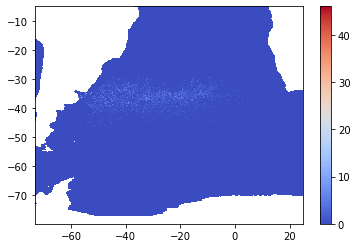

In [323]:
y,x = np.meshgrid(domain_coords['lat'], domain_coords['lon'])

plt.pcolormesh(x,y,histograms['Rio-de-la-Plata'], shading='auto', cmap='coolwarm')
plt.colorbar()

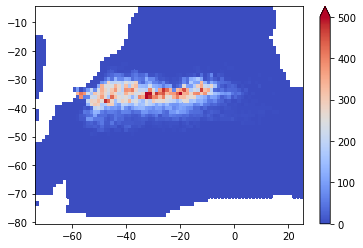

In [328]:
site = 'Rio-de-la-Plata'
y1,x1 = np.meshgrid(coarse_hist[site][2], coarse_hist[site][1])

plt.pcolormesh(x1,y1,coarse_hist[site][0], shading='auto', cmap='coolwarm', vmax=500)
plt.colorbar(extend='max')

In [329]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

Text(0.5, 1.0, 'Rio de la Plata')

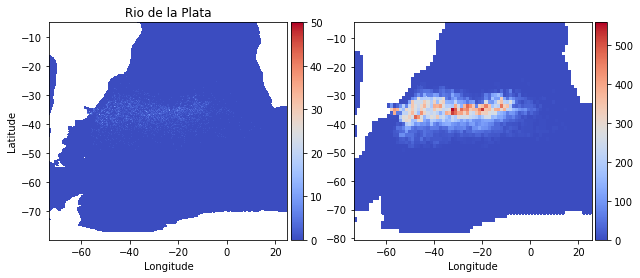

In [330]:
y,x = np.meshgrid(domain_coords['lat'], domain_coords['lon'])
y1,x1 = np.meshgrid(coarse_hist[site][2], coarse_hist[site][1])


fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(10,4))

im1 = ax[0].pcolormesh(x,y,histograms['Rio-de-la-Plata'], shading='auto', cmap='coolwarm', vmax = 50)
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

im2 = ax[1].pcolormesh(x1,y1,coarse_hist[site][0], shading='auto', cmap='coolwarm')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')
ax[1].set_xlabel('Longitude')

ax[0].set_title('Rio de la Plata')

# all particles

In [335]:
coarse_hist = coarse_hist['Luanda']

In [338]:
!mkdir tmp

k = 1

y,x = np.meshgrid(domain_coords['lat'], domain_coords['lon'])
y1,x1 = np.meshgrid(coarse_hist[2], coarse_hist[1])

# DANGER!! long animation, uncomment for loop to run

#for t in range(0, 1321, 5):
    
    lons = particles['lon'][:,t].values
    index = np.where(np.isnan(lons) == False)
    lons = lons[index]
    lats = particles['lat'][:,t].values
    index = np.where(np.isnan(lats) == False)
    lats = lats[index]
    
    # apppending corner points of the domain to keep the 2d histograms the same dimension
    for coord_tuple in itertools.product(domain_coords['lat_lims'], domain_coords['lon_lims']):
        lats = np.hstack((lats,coord_tuple[0]))
        lons = np.hstack((lons,coord_tuple[1]))
    
    H, Lo, La = np.histogram2d(lons, lats, bins=(1176, 899))
    h_mask = np.ma.masked_array(H, mask=domain_coords['land_mask'].transpose())
    histograms = h_mask
    coarse_hist = coarsen(h_mask, domain_coords['lon'], domain_coords['lat'], 15)

    # Plots
    fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(10,4))

    im1 = ax[0].pcolormesh(x,y,histograms, shading='auto', cmap='coolwarm', vmax=50)
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical', extend='max')
    ax[0].set_xlabel('Longitude')
    ax[0].set_ylabel('Latitude')

    im2 = ax[1].pcolormesh(x1,y1,coarse_hist[0], shading='auto', cmap='coolwarm', vmax=500)
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical',extend='max')
    ax[1].set_xlabel('Longitude')

    ax[0].set_title(time_range[t].date())
    
    plt.savefig(f'tmp/frame_{k:03d}', dpi=100, facecolor=(1,1,1,1))
    k +=1
    plt.close()
    
!convert -delay 5 -loop 0 tmp/*.png anim_hist.gif
!rm -rf tmp